##### based on https://pyswarms.readthedocs.io/en/latest/tutorials.html

# Import  and install some of the libraries

In [1]:
!pip install pyswarms

In [2]:
# Import modules
#Import numpy
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc

from IPython.display import Image
from IPython.display import HTML

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.functions.single_obj import sphere as f
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher

# Import backend modules
import pyswarms.backend as P
from pyswarms.backend.topology import Star

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Local Best PSO implementation based on A. Engelbrecht's pseudocode
##### https://www.wiley.com/en-us/Computational+Intelligence%3A+An+Introduction%2C+2nd+Edition-p-9780470035610

## Making a 2-dimensional swarm with 50 particles

In [3]:
# Initialize attributes in the algorithm (LocalBestPSO)
my_topology = Star() # The Topology Class
my_options = {'c1': 0.5, 'c2': 0.3, 'w':0.9, 'k': 2, 'p': 2} # arbitrarily set
my_swarm = P.create_swarm(n_particles=50, dimensions=2, options=my_options) # The Swarm Class

print('The following are the attributes of our swarm: {}'.format(my_swarm.__dict__.keys()))

The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])


## Initialize the loop

In [4]:
iterations = 100 # Set 100 iterations
for i in range(iterations):
    # Part 1: Update personal best
    my_swarm.current_cost = f(my_swarm.position) # Compute current cost
    my_swarm.pbest_cost = f(my_swarm.pbest_pos)  # Compute personal best pos
    my_swarm.pbest_pos, my_swarm.pbest_cost = P.compute_pbest(my_swarm) # Update and store

    # Part 2: Update global best
    # Note that gbest computation is dependent on your topology
    if np.min(my_swarm.pbest_cost) < my_swarm.best_cost:
        my_swarm.best_pos, my_swarm.best_cost = my_topology.compute_gbest(my_swarm)

    # Let's print our output
    if i%20==0:
        print('Iteration: {} | my_swarm.best_cost: {:.4f}'.format(i+1, my_swarm.best_cost))

    # Part 3: Update position and velocity matrices
    # Note that position and velocity updates are dependent on your topology
    my_swarm.velocity = my_topology.compute_velocity(my_swarm)
    my_swarm.position = my_topology.compute_position(my_swarm)

print('The best cost found by our swarm is: {:.4f}'.format(my_swarm.best_cost))
print('The best position found by our swarm is: {}'.format(my_swarm.best_pos))

Iteration: 1 | my_swarm.best_cost: 0.0020
Iteration: 21 | my_swarm.best_cost: 0.0001
Iteration: 41 | my_swarm.best_cost: 0.0000
Iteration: 61 | my_swarm.best_cost: 0.0000
Iteration: 81 | my_swarm.best_cost: 0.0000
The best cost found by our swarm is: 0.0000
The best position found by our swarm is: [-5.43404141e-05  5.15016160e-05]


### Use the LocalBestPSO implementation

In [5]:
# import the implementation
from pyswarms.single import LocalBestPSO

optimizer = LocalBestPSO(n_particles=50, dimensions=2, options=my_options) # Reuse our previous options
optimizer.optimize(f, iters=100)

2020-11-20 20:29:25,192 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=2.83e-8
2020-11-20 20:29:25,351 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 2.8262126265340306e-08, best pos: [ 7.53980647e-05 -1.50257306e-04]


(2.8262126265340306e-08, array([ 7.53980647e-05, -1.50257306e-04]))

## Visualization

##### Libraries and modules necessary for the visualisations were loaded at the beginning

In [6]:
# Create an optimizer. We are using LocalBestPSO to find the minimum value for the sphere function
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9, 'k': 2, 'p': 2}
optimizer = ps.single.LocalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=100)

2020-11-20 20:29:42,501 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=4.64e-9
2020-11-20 20:29:42,652 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 4.642244321616947e-09, best pos: [-6.40335905e-05 -2.32796823e-05]


### 2D plotting

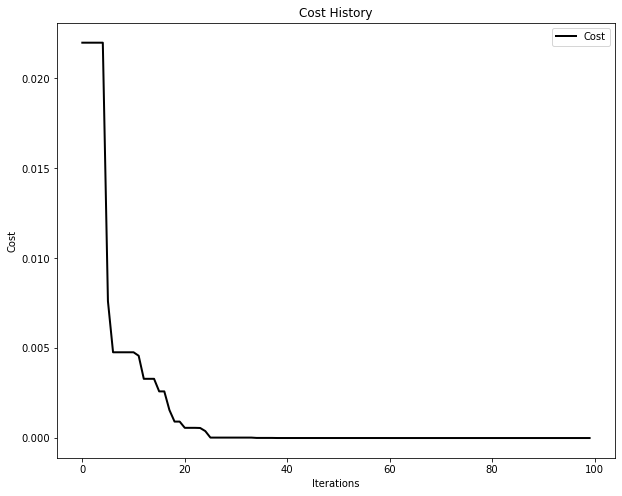

In [7]:
# Obtain a 2D plot of the cost history from the optimizer above
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

### Animating swarms
##### Some of the modules and libraries necessary for the animations were loaded at the beginning

In [8]:
# The Mesher class let us visually recognize where the particles are locatd respecting the objective function
from pyswarms.utils.plotters.formatters import Mesher

In [9]:
# Initialize mesher with sphere function
m = Mesher(func=fx.sphere)

In [10]:
# equivalent to rcParams['animation.html'] = 'html5'
# See http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/
rc('animation', html='html5')

#### 2D Space

RuntimeError: Requested MovieWriter (ffmpeg) not available

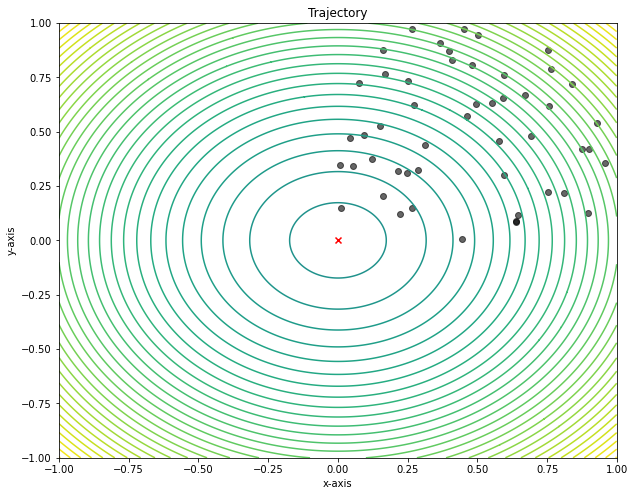

In [11]:
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

# Enables us to view it in a Jupyter notebook
HTML(animation.to_html5_video())

#### 3D Space

RuntimeError: Requested MovieWriter (ffmpeg) not available

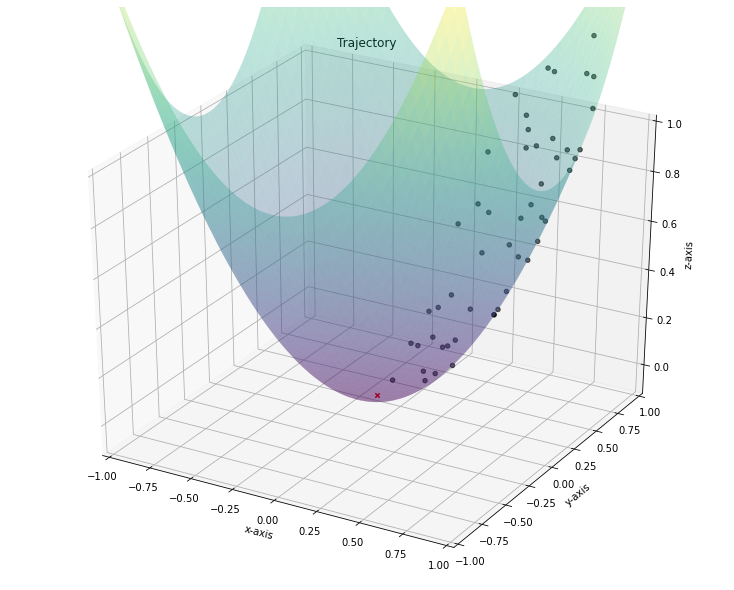

In [12]:
# Obtain a position-fitness matrix using the Mesher.compute_history_3d()
# method. It requires a cost history obtainable from the optimizer class
pos_history_3d = m.compute_history_3d(optimizer.pos_history)

# Make a designer and set the x,y,z limits to (-1,1), (-1,1) and (-0.1,1) respectively
from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))               # Mark minima

# Enables us to view it in a Jupyter notebook
HTML(animation3d.to_html5_video())